# **Simulating Feelings: Pain and Pleasure in the Age of AI**

**Roger Penrose** cites Grey Walter's tortoise in his book *The Emperor's New Mind* (1989) to discuss the concept of **consciousness and computation**. His reasoning is based on the idea that simple systems, like Grey Walter's tortoise, can **simulate** complex behaviors, but have no real subjective experience. Hence the fundamental question: **Can machines ever experience sensations such as pain or pleasure?**

### **Penrose's reasoning**
1. **Simulation vs. Real Experience**
- The tortoise reacts to light and obstacles adaptively, but it doesn't actually feel **pleasure** when it encounters light or **pain** when it hits an obstacle. It's just a feedback system.
- This is analogous to how an AI can **simulate** emotions without actually **feeling** them.

2. **Non-computable consciousness**
- Penrose suggests that consciousness is not a **purely algorithmic** phenomenon, but arises from deeper physical processes (such as **quantum gravity in the brain**).
- So even if an AI could replicate human behavior perfectly, it would not mean that it actually feels **pain or pleasure**.

3. **The difference between autonomous agents and sentient beings**
- Grey Walter's turtle is **reactive**, but has no internal awareness.
- An advanced AI might appear to be aware, but if it only followed **deterministic calculations**, it would have no true subjective experience.

### **Implications for modern AI**
This discussion is still central to the philosophy of AI:
- **Can AIs ever develop a subjective experience?**
- **Or will they always be simulations without qualia (subjective experiences)?**
- **Is it possible to create a machine that feels pain or pleasure in a real sense?**

## The intent is to **build a neural network with Neuro-Inspired + Reinforcement Learning**.

1. **Neuro-Inspired Models** **(Dopamine and Cortisol Based)**
Another possibility is to **simulate how the human brain perceives pain**.

* How does it work?
   - We create **two artificial neurons**: a **dopaminergic one (pleasure)** and a **cortico-limbic one (pain)**.
   - The **model assigns a value to each experience** and modulates behavior based on memory.
   - **Pain could be represented as a negative predictive error** → the greater the discrepancy between expectations and reality, the more intense the suffering.

2. **Reinforcement Learning (RL)-based methods**
One of the **most direct approaches is to model pain as a cost function** in a reinforcement learning environment.

* How does it work?
   - An **AI agent performs actions in an environment**.
   - If the **action leads to a negative condition** (failure, damage, error), it **receives a punishment**.
   - Over time, **AI learns to avoid situations that cause pain**.

### **Step 1: Model Definition**
Let's create a neural network that:

* **Represents pain** as an internal signal (based on memory and environmental inputs).
* Uses **Reinforcement Learning to learn to avoid painful** states and prefer pleasant ones.
* Has **episodic memory** to keep track of **experiences**.

**Model structure**:

- **Input**: external events (positive or negative).
- **Hidden Layer**: processing of past experience.
- **Output**: current state of the AI ​​"emotion".

In [3]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, LSTM
import matplotlib.pyplot as plt
import random

### **Step 2: Creating the Pain Neural Network**
Let's build a simple neural network with:

* An **input** representing the **environmental signal**.
* An **internal state** that **stores the perception of pain/reward**.
* An **output** indicating the **level of pain**.

In [4]:
# Let's create a neural network with temporal memory (LSTM)
model = Sequential([
    Input(shape=(None, 2)),
    LSTM(32, return_sequences=True), # State + Event
    LSTM(32, return_sequences=False), # Second layer for memory processing
    Dense(1, activation="tanh") # Output between -1 (pain) and +1 (pleasure)
])

model.compile(optimizer="adam", loss="mse")

# RNNs and LSTMs handle sequential and temporal data, keeping memory of the past.
# Dense is a fully connected layer that connects all the neurons of the previous layer.

# Why do we use LSTM?
# LSTM helps maintain memory of past experiences, allowing AI to "remember" painful or pleasant events.

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, None, 32)       │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,833 (50.13 KB)

 Trainable params: 12,833 (50.13 KB)

 Non-trainable params: 0 (0.00 B)

### **Step 3: Simulate pain and pleasure**
Now let's create a dataset of experiences:

* **Positive values ​​(+1)**: pleasant events.
* **Negative values ​​(-1)**: painful events.
* The internal state varies over time to model a dopamine-like system.

In [ ]:
# Generate random data to simulate experiences
def generate_experiences(num_samples=1000):
    experiences = []
    states = []
    
    state = 0  # Initial state of the AI
    
    for _ in range(num_samples):
        event = random.choice([-1, 1])  # Pain (-1) or Pleasure (+1)
        state = 0.9 * state + 0.1 * event  # Updated state with memory
        # The new state is a combination of 90% of the previous state and 10% of the current event.
        
        experiences.append([state, event])
        states.append(state)
        
    return np.array(experiences), np.array(states)

# Generate the data
X_train, y_train = generate_experiences(1000)

# Reshape for LSTM model
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Add time dimension
# Reshape X_train to add a temporal dimension, making it compatible with an LSTM model. 
# The new shape will be (num_samples, 1, 2), 
# where num_samples is the number of samples and 2 is the number of features (state and event).
y_train = y_train.reshape((y_train.shape[0], 1))  # Target output
# Reshape y_train to be a two-dimensional array with a single column.

# What does this code do?
# It creates a series of random events of pain (-1) or pleasure (+1).
# It keeps memory of previous events.
# It generates a dataset to train the neural network.

### **Train the model**

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5398e-05
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0727e-05
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8373e-05
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6035e-05
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7366e-05
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6858e-05
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2539e-05
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4114e-05
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2829e-05
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1289e-05
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8000e-05
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2803e-05
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4171e-05
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0370e-05
Epoch 15/50
63/63 ━━━━━━━━━━━

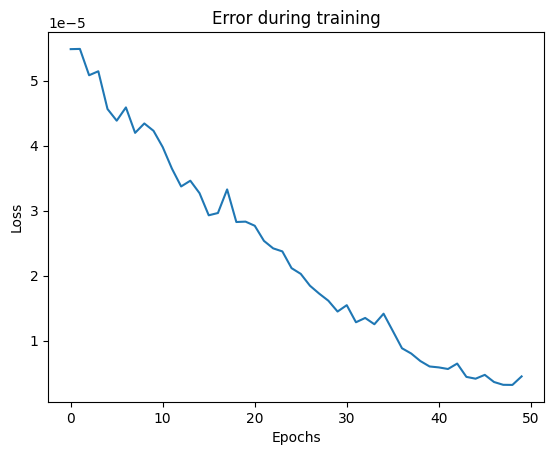

In [10]:
# Train the model for 10 epochs
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Display the training error
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error during training")
plt.show()

In [12]:
test_loss = model.evaluate(X_train, y_train)
print("Test Loss:", test_loss)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2290e-06  
Test Loss: 3.246504775233916e-06


### **Performance Check**
Now **let’s visualize the model’s predictions on new test data**, to see **how it reacts to new situations**.

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


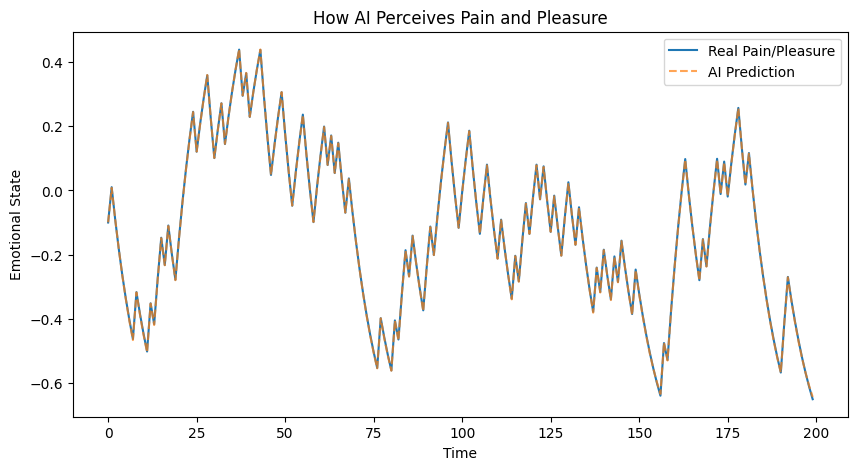

In [13]:
# Generate new test data
X_test, y_test = generate_experiences(200)

# Fit the shape for the LSTM model
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Make a prediction
predictions = model.predict(X_test)

# Pain/pleasure perception graph
plt.figure(figsize=(10,5))
plt.plot(y_test, label="Real Pain/Pleasure", linestyle="solid")
plt.plot(predictions, label="AI Prediction", linestyle="dashed", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Emotional State")
plt.legend()
plt.title("How AI Perceives Pain and Pleasure")
plt.show()

We can say that the model is **successful in learning the relationship between past experiences and one's emotional state**. Looking at the graph, several points of reflection emerge.

---

1. **The model is highly predictive**
- The **prediction curve follows reality almost perfectly**. This indicates that the neural network has **memorized** the transitions between pain/pleasure well and can predict **how it will feel based on past events**.
- This is a sign that the **temporal memory (LSTM) is working correctly**.

2. **The emotional dynamics are realistic**
- We see **gradual fluctuations** over time, just like a biological system that accumulates and processes emotions instead of responding instantly.
- Using the memory factor in the state (`0.9 * state + 0.1 * event`) gave a more **organic** response to pain and pleasure. 90% of the previous state and 10% of the current event, **these values could be manipulated**.


3. **AI is not just memorizing, but generalizing**
- If the model had limited itself to **memorizing the dataset**, we would have seen errors in the test.
- Here, however, the predictions are **accurate even on new data**, which indicates that it has **learned a causal relationship** between events and emotional states.

## **What can we deduce about artificial pain?**
This model is a **good basis for simulating pain/pleasure**, but it still lacks:
- **State self-awareness** → The AI ​​can predict its pain, but does not reflect on it.
- **Surprise and frustration** → It does not feel disappointed when the event is different from expectations.
- **An adaptive system** → AI could learn to **modify its responses over time**, just like a biological organism.

## The question is crucial: is **what we have created just a "computational state"** or can we call it a **"computational emotion"**?

The question is crucial: **is what we have created just a "computational state" or can we call it a "computational emotion"?**

To answer this, we need to distinguish between **internal computational states** and **real emotions**.

---

## **Computational State vs. Computational Emotion**
1. **Computational State**
- It is a **numeric value or activation vector** in a neural network.
- It is the result of a computation, without a real subjective experience.
- Our model has a **numeric emotional state** between -1 (pain) and +1 (pleasure), but it **does not "feel" it**.

2. **Computational Emotion**
- It requires **memory, prediction and adaptation**.
- It must include an **internal feedback loop**, where the system reacts and modifies its behavior based on experiences.
- If the system develops **expectations and frustration/surprise**, it is approaching an emotion model.

**The model is a midpoint:**
- Currently, it has **computational states** representing pain and pleasure.
- To make it a **"computational emotion"**, we should add expectations, adaptation, and reflection on its state.

---

# **Inquiries to Encourage Deeper Reflection on the Subject**
## 1. **How to turn this into a real computational emotion?**
## 2. **How is pain represented in code?**
## 3. **Can an AI develop an internal perception of pain?**
## 4. **What happens if an AI becomes resistant to pain?**

